`Use-case: IRIS Classification Problem`

### IRIS Dataset

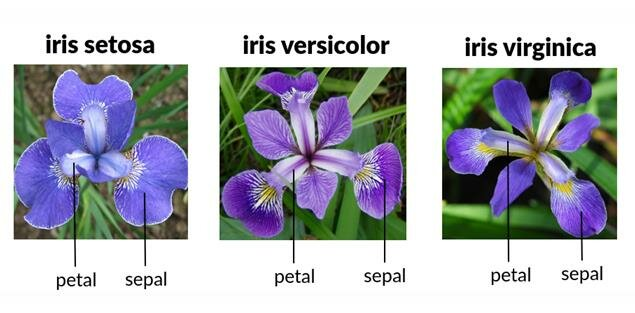

### Import certain libraries

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier #scikit library
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [16]:
os.getcwd()

'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\05. AI and DL IITR-15Mar2025(M)'

### Step #1 Load the `IRIS` data

`MLP Implementation architecture`

#### Input Layer --> `One` Hidden Layer --> Output Layer

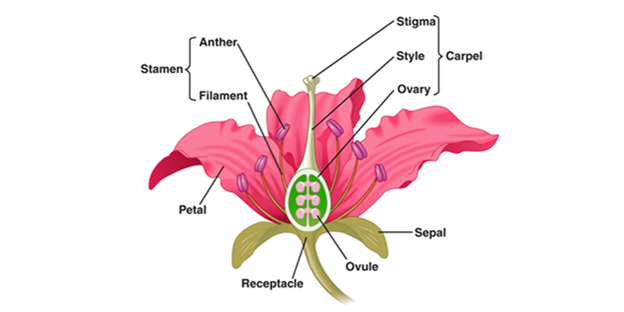

In [17]:
from sklearn.datasets import load_iris

In [18]:
### Load the iris dataset
iris = load_iris()

In [19]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### `UCI Repo` : https://archive.ics.uci.edu/dataset/53/iris

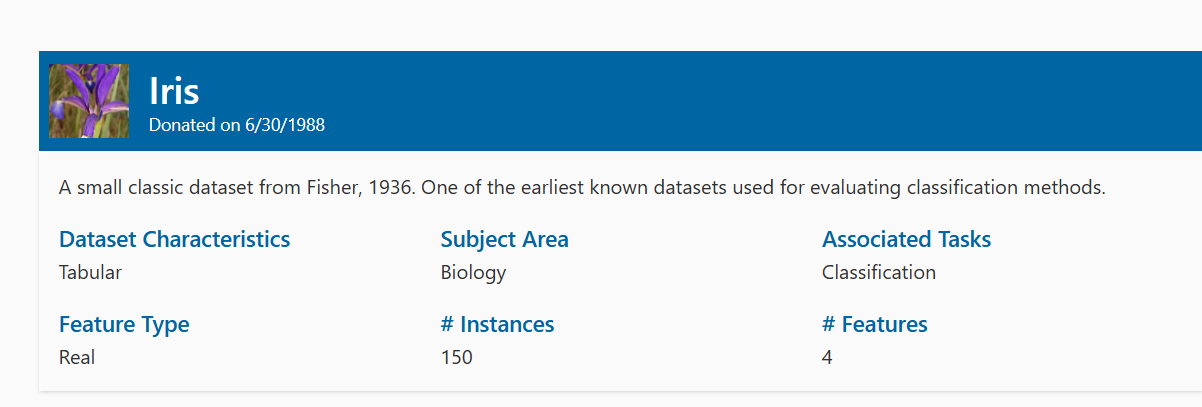

In [20]:
df_iris = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

In [21]:
df_iris.sample(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
76,6.8,2.8,4.8,1.4,1
16,5.4,3.9,1.3,0.4,0
30,4.8,3.1,1.6,0.2,0
70,5.9,3.2,4.8,1.8,1
136,6.3,3.4,5.6,2.4,2
42,4.4,3.2,1.3,0.2,0


In [22]:
### Unique classes
df_iris['target'].unique()

array([0, 1, 2])

In [23]:
### Unique classes
df_iris['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

-- Balanced 3 classes dataset

### `INPUT LAYER` ---> ` (1) HIDDEN LAYER` ---> `OUTPUT LAYER`

In [99]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate = 0.01, epochs=100):
        self.input_size = input_size # no. of features (input vars) in the input layer
        self.hidden_size = hidden_size # no. of neurons in the hidden layer
        self.output_size = output_size # no. of neurons in the output layer
        self.learning_rate = learning_rate # learning rate for the gradient descent step
        self.epochs = epochs # no. of training epochs
        
        ###############################
        # INPUT LAYER TO HIDDEN LAYER
        ###############################
        #### Weights and biases initialization
        
        self.W1 = np.random.randn(self.input_size, self.hidden_size)*0.01 # random weights from input to hidden layer
        self.b1 = np.zeros((1, self.hidden_size)) # bias for the hidden layer
        
        ###############################
        # HIDDEN LAYER TO OUTPUT LAYER
        ###############################
        self.W2 = np.random.randn(self.hidden_size, self.output_size)*0.01 # random weights from hidden layer to output layer
        self.b2 = np.zeros((1, self.output_size)) # bias for the output layer
        
        ## Loss history & accuracy history for PLOTTING
        self.loss_history = [] #empty list initialized to store the loss values during training epochs
        self.accuracy_history = [] #empty list initialized to store the accuracy values during training epochs
        
        
    ### Add some activation functions
    
    ### ReLU Activation Function
    def relu(self, z):
        return np.maximum(0, z)
    
    ### Derivative of ReLU for backpropagation
    def relu_derivative(self, z):
        return np.where(z>0, 1, 0)
    
    ### Softmax for multi-class classification
    def softmax(self, z):
        exp_values = np.exp(z - np.max(z, axis=1, keepdims=True)) # subtract max for numerical stability
        return exp_values/np.sum(exp_values, axis=1, keepdims=True)
    
    
    ###############################
    ### FORWARD PROPAGATION
    ###############################
    def forward(self, X):
        
        ###############################
        # INPUT LAYER TO HIDDEN LAYER
        ###############################
        self.z1 = np.dot(X, self.W1) + self.b1
#         print('FIRST WEIGHTED SUM:',self.z1.shape)
        self.a1 = self.relu(self.z1) #computes the activated value in the hidden layer using ReLU function
#         print('FIRST ACTIVATED VALUES:',self.a1.shape)
        ###############################
        # HIDDEN LAYER TO OUTPUT LAYER
        ###############################
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.probs = self.softmax(self.z2) #computes the probabilities using softmax for multi-class classification
#         print('CLASS PROABILITIES:',self.probs.shape)
        return self.probs
    
    ###############################
        ### LOSS COMPUTATION
    ###############################   
    ### cross-entropy loss for multi-class classification
    def compute_loss(self, y_true, probs):
        loss = -np.mean(np.sum(y_true * np.log(probs), axis=1))
        return loss
    
    ### Compute accruacy
    def compute_accuracy(self, y_true, probs):
        predictions = np.argmax(probs, axis=1)
        true_labels = np.argmax(y_true, axis=1)
        return np.mean(predictions ==true_labels)
    
    
    ###############################
        ### BACK PROPAGATION
    ###############################  
    
    def backward(self, X, y):
        ### number of rows/training examples
        m = X.shape[0]
        
        ### Gradients of the loss w.r.t weights and biases of the output layer
        delta3 = self.probs - y 
        dW2 = np.dot(self.a1.T, delta3)/m #gradient (batch) of the loss w.r.t weights of the output layer (dW2)
        db2 = np.sum(delta3, axis=0, keepdims=True)/m # Gradient of the loss w.r.t. bias of the output layer (db2)
        
        ### Gradients of the loss w.r.t weights and biases of the HIDDEN layer
        delta2 = np.dot(delta3, self.W2.T) * self.relu_derivative(self.z1) # used derivative of ReLU
        dW1 = np.dot(X.T, delta2)/m #gradient(batch) of the loss w.r.t. weights of the hidden layer (dW1)
        db1 = np.sum(delta2, axis=0, keepdims=True)/m #gradient of the loss w.r.t bias of the hiddden layer (db1)
        
        ### Update the parameters - weights and biases across the layers
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        
    
        
    ###############################
        ### TRAINING
    ###############################      
        
    def train(self, X, y):
        for epoch in range(self.epochs):
            
            ### Forward pass:
            probs = self.forward(X) # computes the predictions using forward pass
            
            ### Compute the cateogorical cross-entropy loss
            loss = self.compute_loss(y, probs)
            accuracy = self.compute_accuracy(y, probs)
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)
            
            ### Backward pass (Backpropagation)
            self.backward(X,y)
            
            ### Print the progress after every 10 epochs
            if epoch % 10 ==0:
                print(f'Epoch: {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
     
    ###############################
        ### TESTING
    ###############################  
    def test(self, X_test, y_test):
        probs = self.forward(X_test)
        loss = self.compute_loss(y_test, probs)
        accuracy = self.compute_accuracy(y_test, probs)
        
        print(f'Test Loss: {loss:.4f}, Test_Accuracy: {accuracy:.4f}')
        return loss, accuracy

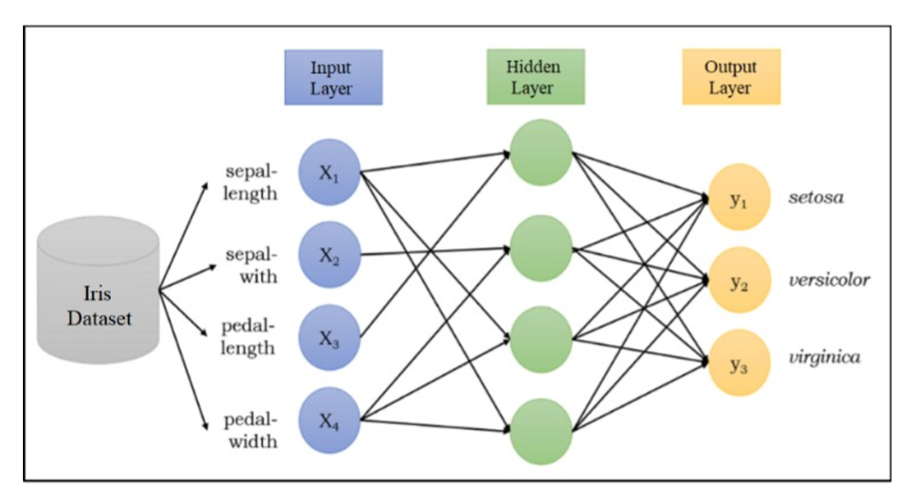

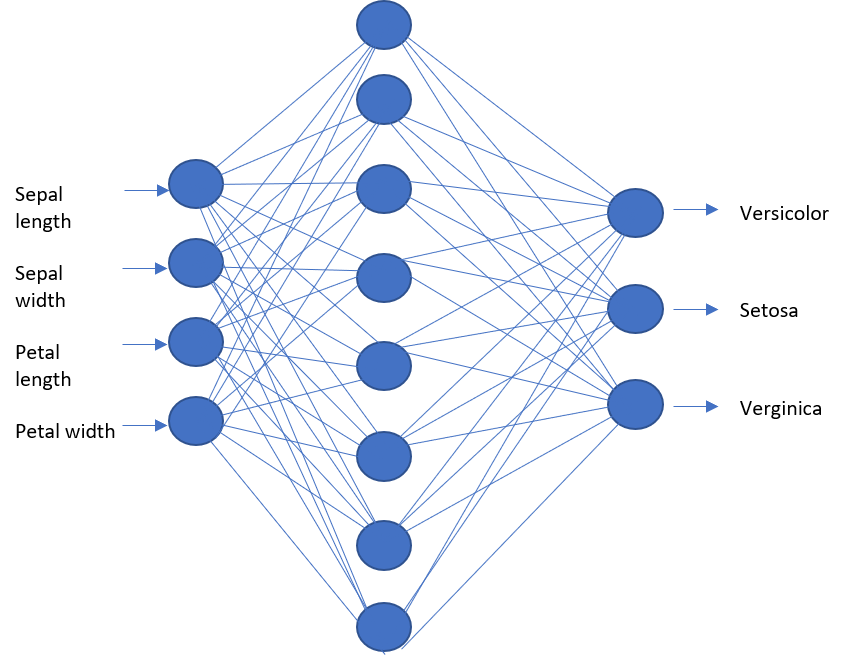

### `Initialize` the network for `IRIS` dataset

In [100]:
input_size = 4 # number of input features (directly from IRIS dataset)
hidden_size = 8 # number of neurons in the hidden layer
output_size = 3 # number of neurons in the output layer

### `FIRE` the very much our own `NN` --> MLP

In [101]:
nn = NeuralNetwork(input_size, hidden_size, output_size,learning_rate=0.03, epochs=500)

In [102]:
nn

### Training

In [103]:
X = iris.data

In [104]:
y= iris.target

In [105]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### One hot encoding

In [106]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1,1))

C:\Users\think\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [107]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

### Split the `IRIS` dataset into `training` and `testing` sets

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [109]:
X_train.shape

(120, 4)

In [110]:
X_test.shape

(30, 4)

In [111]:
30/150*100

20.0

In [112]:
### Train the already configured nn model on the training set
nn.train(X_train, y_train) # make the MLP model to learn input and target relationship

CLASS PROABILITIES: (120, 3)
Epoch: 0, Loss: 1.0987, Accuracy: 0.3500
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
Epoch: 10, Loss: 1.0981, Accuracy: 0.3417
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
Epoch: 20, Loss: 1.0975, Accuracy: 0.3417
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS

CLASS PROABILITIES: (120, 3)
Epoch: 430, Loss: 0.2313, Accuracy: 0.9833
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
Epoch: 440, Loss: 0.2241, Accuracy: 0.9833
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
Epoch: 450, Loss: 0.2172, Accuracy: 0.9833
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
CLASS PROABILITIES: (120, 3)
C

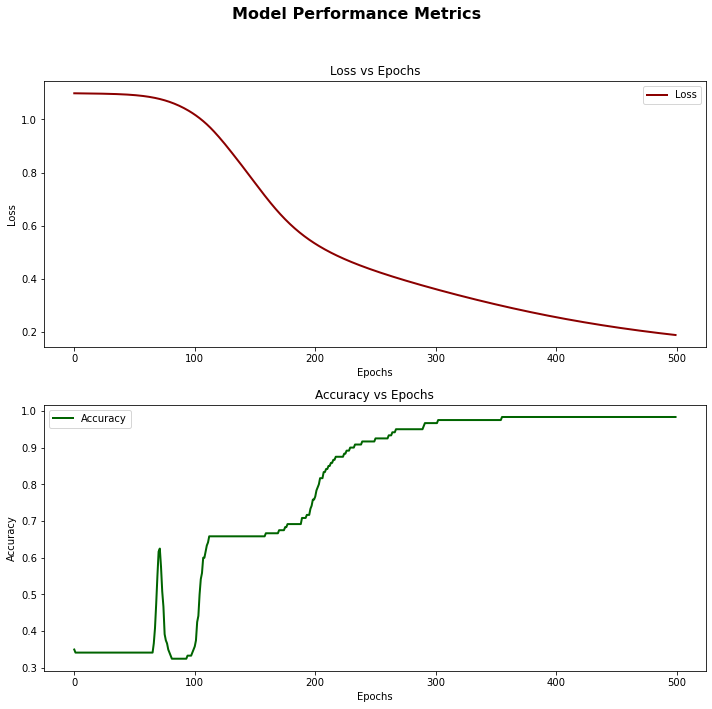

In [113]:
fig, ax = plt.subplots(2,1, figsize = (10,10))

### Plot the loss by epoch
ax[0].plot(nn.loss_history, label='Loss', color='darkred', linewidth=2)
ax[0].set_title('Loss vs Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()


### Plot the accuracy by epoch
ax[1].plot(nn.accuracy_history, label='Accuracy', color='darkgreen', linewidth=2)
ax[1].set_title('Accuracy vs Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

### Add a super title
plt.suptitle('Model Performance Metrics', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the super title

plt.show()

### `CODE EXPLANATION`

#### `Weights`

In [57]:
k = np.random.randn(input_size, hidden_size)*0.01 # random weights from input to hidden layer

In [62]:
k.shape

(4, 8)

In [63]:
k.ndim

2

In [64]:
k

array([[-3.66452599e-03,  1.95105588e-03,  5.38233958e-03,
         1.02819329e-02, -1.88644767e-03, -6.80463830e-03,
        -9.66353584e-03, -8.40756849e-03],
       [-3.44566826e-03, -5.03221675e-03,  2.33261054e-02,
         1.45458400e-02, -4.31689845e-03,  8.83447813e-03,
        -1.13669175e-02,  1.63665101e-02],
       [ 1.56604615e-03, -9.80091441e-03, -1.84196418e-02,
        -3.88246702e-04, -1.65084631e-02,  4.20429353e-03,
         7.64897883e-03,  5.52020841e-03],
       [-3.65646603e-03,  9.18679046e-03, -8.24263697e-05,
        -6.99377977e-03, -1.93214385e-03, -1.76876010e-04,
        -1.20089530e-02, -3.67349722e-03]])

In [60]:
k.main(),k.max()

(-0.018419641752712594, 0.023326105387081436)

In [61]:
np.random.randn(10)

array([ 1.36900413, -0.92965628, -1.42750907,  2.03512473,  0.1575954 ,
        0.77745848,  0.35378257, -0.68648457,  0.4260211 ,  1.24861185])

#### `Bias`

In [66]:
l = np.zeros((1,hidden_size)) # bias for the hidden layer     

In [67]:
l.shape

(1, 8)

In [68]:
l

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [69]:
X.shape

(150, 4)

### COMPUTE LOSS  & ACCURACY | `Example`

In [152]:
y_true = [
  [1, 0, 0],
  [0, 1, 0],
  [0, 0, 1]
]

probs = [
  [0.8, 0.1, 0.1],
  [0.2, 0.5, 0.3],
  [0.1, 0.2, 0.7]
]


In [153]:
y_true

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

In [154]:
len(y_true)

3

In [155]:
probs

[[0.8, 0.1, 0.1], [0.2, 0.5, 0.3], [0.1, 0.2, 0.7]]

In [156]:
y_true*np.log(probs)

array([[-0.22314355, -0.        , -0.        ],
       [-0.        , -0.69314718, -0.        ],
       [-0.        , -0.        , -0.35667494]])

In [157]:
print('Sum per row:', np.sum(y_true*np.log(probs), axis=1))

Sum per row: [-0.22314355 -0.69314718 -0.35667494]


In [158]:
print('Final Loss (Mean after negation):', -np.mean(np.sum(y_true*np.log(probs), axis=1)))

Final Loss (Mean after negation): 0.4243218919376292


In [159]:
predictions = np.argmax(probs, axis=1)

In [160]:
probs

[[0.8, 0.1, 0.1], [0.2, 0.5, 0.3], [0.1, 0.2, 0.7]]

In [161]:
predictions

array([0, 1, 2], dtype=int64)

In [162]:
true_labels = np.argmax(y_true, axis=1)

In [163]:
y_true

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

In [164]:
true_labels

array([0, 1, 2], dtype=int64)

In [167]:
print('Accuracy is:', np.mean(predictions==true_labels)*100)

Accuracy is: 100.0
